In [3]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import control


## Estimación de Sistema de Primer Orden con Mínimos con regularización

Se tiene un sistema dado por la siguiente relación:

$$y(t) = \theta_0.x(t) + \theta_1.\frac{dy}{dt}$$

En tiempo discreto se tendría lo siguiente:

$$y[k] = \theta_0.x[k] + \theta_1.y[k-1]$$

Por tanto el modelo estaría dado por:

$$y[k] = \phi.\theta$$

Donde:
$$\phi = \begin{bmatrix}x[k]&y[k-1]\end{bmatrix}$$

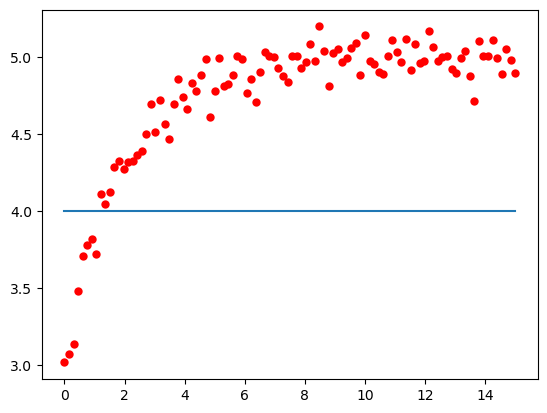

In [26]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
ones = np.linspace([1],[1],100)
t = np.linspace([0],[15],100)
x = np.linspace([4],[4],100)

x1 = np.linspace([0],[0],100)
y1 = np.linspace([0],[0],100)
y2 = np.linspace([0],[0],100)

y = 5-2*np.exp(-t/2)
r = 0.1
yn = y + np.random.normal(0,r,t.shape)
plt.scatter(t,yn,color = 'red',linewidths= 0.01)
plt.plot(t,x)

In [27]:
### Creando el arreglo y[n-1]
for k in range(1,len(yn)):
    y1[[k]]=yn[[k-1]]
    x1[[k]]=x[[k-1]]
    
    
for k in range(2,len(yn)):
    y2[[k]]=yn[[k-2]]

## Creación del vector phi
phi = np.concatenate((x,x1, y1,y2, ones), axis=1)
##phi = np.concatenate((ones, np.exp(-t/2)), axis=1)

alpha = 0.2            #Valor de regularización
A = np.dot(phi.T,phi)+alpha*np.eye(5)
theta = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
theta

array([[ 0.69486705],
       [-0.53139726],
       [ 0.69084305],
       [ 0.14004982],
       [ 0.17371676]])

$y_e[k] = 0.6948x[k] - 0.531x[k-1]+ 0.69084y[k-1]+ 0.14y[k-2] + 0.1737 $

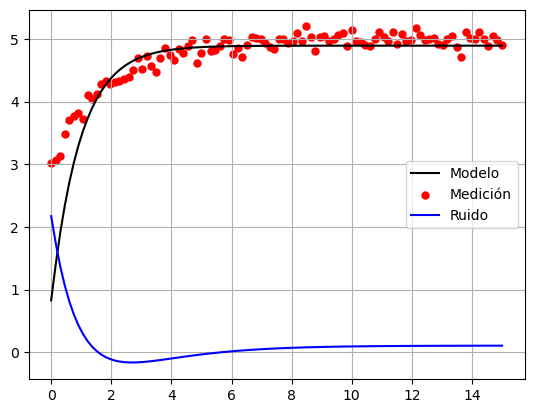

In [29]:
##y_e = np.dot(phi,theta)

### Reconstruir la señal y_e
y_e = np.linspace([0],[0],100)
for k in range(len(yn)):
    y_e[k] = theta[0]*x[k]+theta[1]*x[k-1]+theta[2]*y_e[k-1]+theta[3]*y_e[k-2]+theta[4];

#y_e1 = np.dot(phi,theta)
    
e = y - y_e
plt.plot(t,y_e,color = 'black')
plt.scatter(t,yn,color = 'red',linewidths= 0.01)
plt.plot(t,e,color = 'blue')
plt.legend(['Modelo','Medición','Ruido'])
plt.grid()


In [31]:
## Calculando ECM y R^2
ECM = np.dot(e.transpose(),e)/100
R2 = 1 - (np.dot(e.transpose(),e))/(np.dot(yn.transpose(),yn))
ECM, R2

(array([[0.12891284]]), array([[0.99431447]]))

In [30]:
(array([[0.12891284]]), array([[0.99431447]]))
(array([[0.10891683]]), array([[0.99520191]]))
(array([[0.08318888]]), array([[0.99632271]]))

NameError: name 'array' is not defined